In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

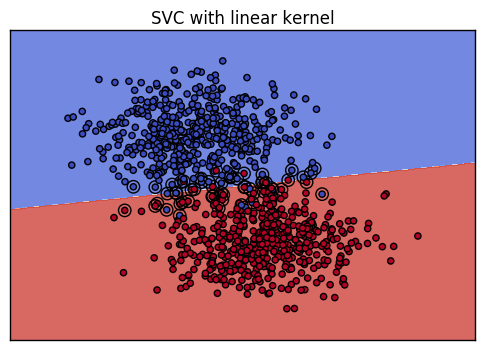

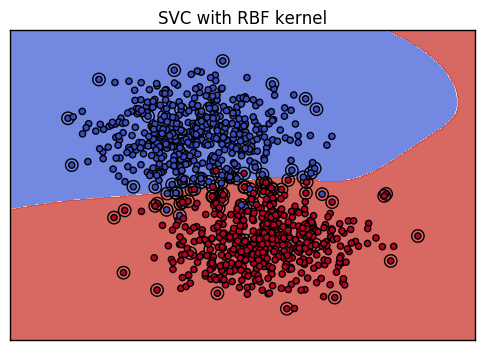

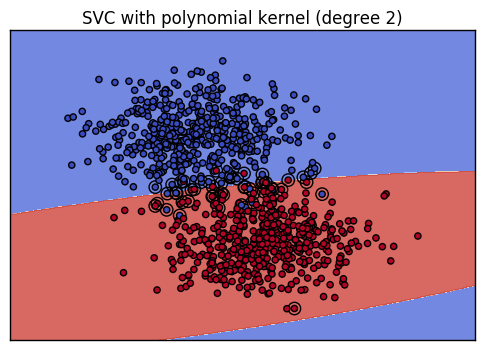

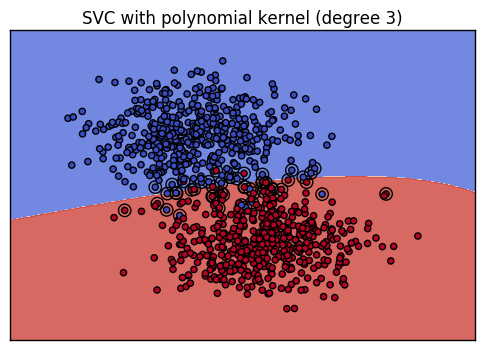

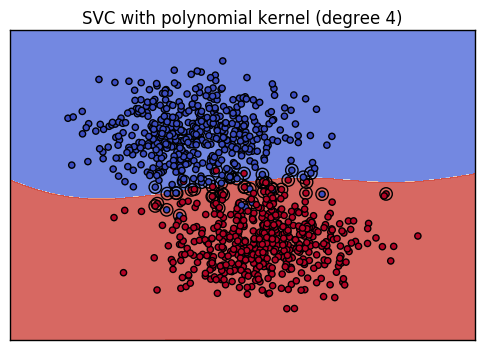

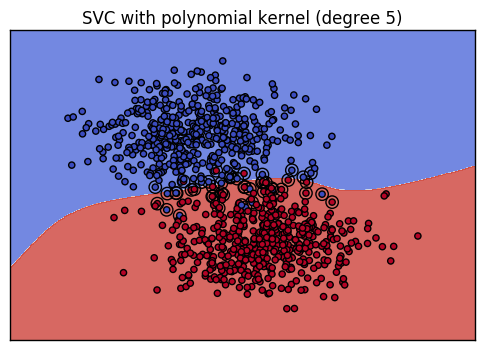

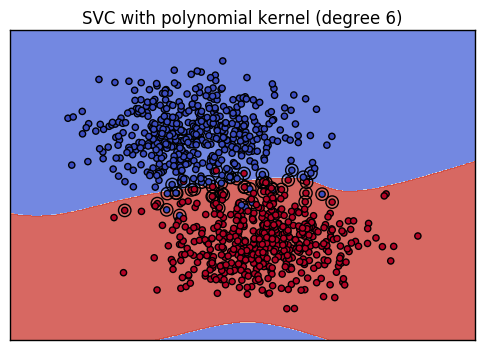

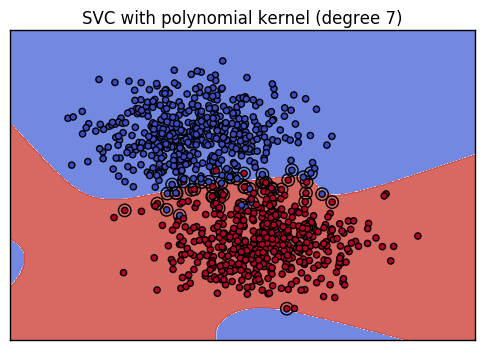

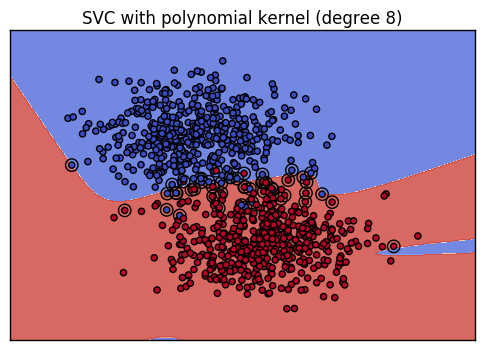

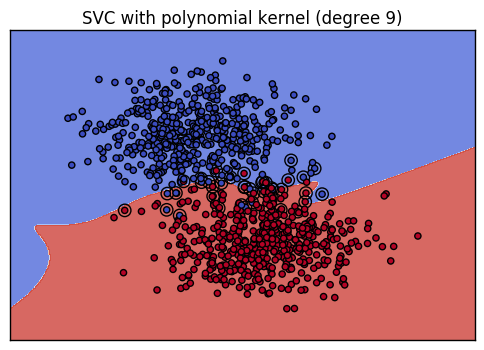

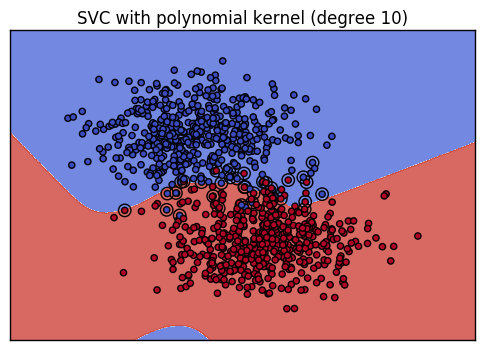

In [12]:
dataset = pd.read_csv('blobs2.csv')
# dataset
X = dataset.values[:, :-1]
Y = dataset.label
h = .02
C = 1.0

svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = []
for i in range(2, 11):
    poly_svc.append(svm.SVC(kernel='poly', degree=i, C=C).fit(X, Y))

x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'SVC with RBF kernel']
for i in range(2, 11):
    titles.append('SVC with polynomial kernel (degree {})'.format(i))
# print(titles)
for i, clf in enumerate((svc, rbf_svc, poly_svc[0], poly_svc[1], poly_svc[2], poly_svc[3], poly_svc[4], 
                                        poly_svc[5], poly_svc[6], poly_svc[7], poly_svc[8])):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [11]:
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
import pandas as pd

dataset = pd.read_csv('cancer.csv')
train, test = ms.train_test_split(dataset, train_size=0.9)

In [12]:
# train

In [13]:
def linear_kernel(train, test):
    n = train.shape[0]

    train_val = train.values[:, 1:]  
    train_label = train.label
    test_val = test.values[:, 1:]
    test_label = test.label

    plt.title('linear kernel')
    plt.xlabel('support vector')
    plt.ylabel('loss')
    
    for c in np.arange(1, 100, 2):
        svc = svm.SVC(kernel='linear', C=c)
        svc = svc.fit(train_val, train_label)
        n_support_vec = svc.support_vectors_.shape[0]

        train_res = svc.predict(train_val)
        test_res = svc.predict(test_val)

        diff_train = np.sum(train_label != train_res) / train.shape[0]
        diff_test = np.sum(test_label != test_res) / test.shape[0]

        plt.plot(n_support_vec, diff_train, 'ko')
        plt.plot(n_support_vec, diff_test, 'go')
        plt.plot(n_support_vec, diff_train - diff_test, 'bo')
#         break
    plt.show()

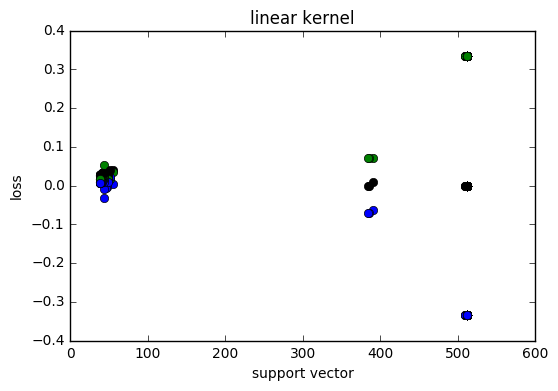

In [14]:
linear_kernel(train, test)

In [15]:
def rbf_kernel(train, test):
    n = train.shape[0]

    train_val = train.values[:, 1:]  
    train_label = train.label
    test_val = test.values[:, 1:]
    test_label = test.label

    plt.title('rbf kernel')
    plt.xlabel('support vector')
    plt.ylabel('loss')
    

    for c in np.arange(1, 100, 2):
        for gamma in np.arange(1 / n, 1, 0.01):
            svc = svm.SVC(kernel='rbf', gamma=gamma, C=c)
            svc = svc.fit(train_val, train_label)
            n_support_vec = svc.support_vectors_.shape[0]

            train_res = svc.predict(train_val)
            test_res = svc.predict(test_val)

            diff_train = np.sum(train_label != train_res) / train.shape[0]
            diff_test = np.sum(test_label != test_res) / test.shape[0]

            plt.plot(n_support_vec, diff_train, 'ko')
            plt.plot(n_support_vec, diff_test, 'go')
            plt.plot(n_support_vec, diff_train - diff_test, 'bo')
    plt.show()

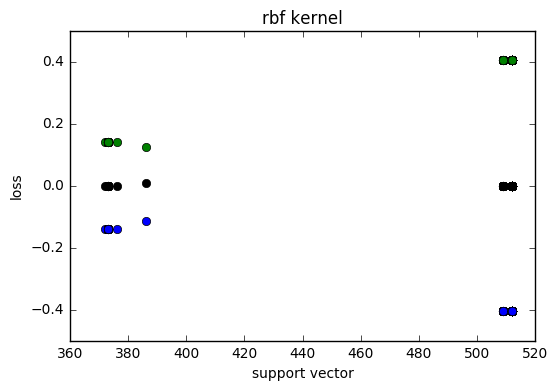

In [16]:
rbf_kernel(train, test)

In [44]:
def poly_kernel(train, test):
    n = train.shape[0]

    train_val = train.values[:, 1:]  
    train_label = train.label
    test_val = test.values[:, 1:]
    test_label = test.label

    plt.title('poly kernel')
    plt.xlabel('support vector')
    plt.ylabel('loss')
    
    
    vectors = np.empty(dtype=int, shape=(19,))
    diff_train = np.empty(dtype=int, shape=(19, ))
    diff_test = np.empty(dtype=int, shape=(19, ))
    i = 0
    for c in np.arange(1, 20, 1):
        for degree in np.arange(1, 2, 1):
            svc = svm.SVC(kernel='poly', degree=degree, C=c).fit(train_val, train_label)
            n_support_vec = svc.support_vectors_.shape[0]

            train_res = svc.predict(train_val)
            test_res = svc.predict(test_val)
            
            diff_train[i] = np.sum(train_label != train_res)
            diff_test[i] = np.sum(test_label != test_res)
            vectors[i] = n_support_vec
            i += 1            
        print(c)
    
    diff_train = diff_train / train.shape[0]
    diff_test = diff_test / test.shape[0]
    plt.plot(vectors, diff_train, 'ko')
    plt.plot(vectors, diff_test, 'go')
    plt.plot(vectors, diff_train - diff_test, 'bo')
    plt.show()
    return diff_train, diff_test, vectors

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


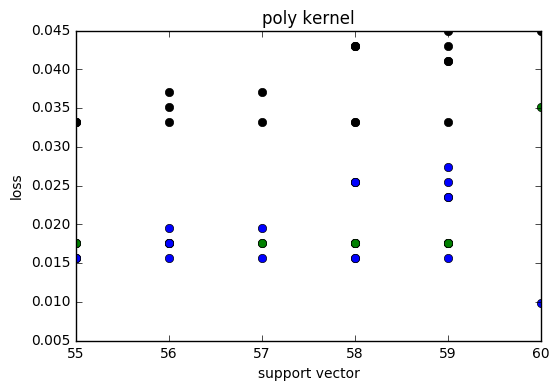

In [45]:
diff_train, diff_test, vectors = poly_kernel(train, test)

In [33]:
diff_train, vectors

(array([ 0.04492188,  0.04492188,  0.04101562,  0.04296875,  0.04296875,
         0.04296875,  0.04296875,  0.04101562,  0.03320312,  0.03320312,
         0.03320312,  0.03320312,  0.03515625,  0.03710938,  0.03710938,
         0.03320312,  0.03320312,  0.03320312,  0.03320312,  0.03320312,
         0.03320312,  0.03320312,  0.03320312,  0.03320312,  0.03320312,
         0.03320312,  0.03320312,  0.03320312,  0.03320312,  0.03320312,
         0.03320312,  0.03320312,  0.03320312,  0.03320312,  0.03515625,
         0.03515625,  0.03515625,  0.03515625,  0.03320312,  0.03320312,
         0.03125   ,  0.03125   ,  0.03125   ,  0.03125   ,  0.03125   ,
         0.03125   ,  0.03125   ,  0.03125   ,  0.03125   ,  0.02929688]),
 array([60, 59, 59, 58, 58, 59, 58, 59, 58, 58, 59, 57, 56, 57, 56, 55, 55,
        56, 55, 55, 54, 54, 54, 54, 54, 54, 54, 53, 54, 54, 54, 54, 54, 53,
        55, 54, 54, 53, 52, 52, 52, 52, 51, 51, 52, 52, 52, 52, 51, 51]))